In [1]:
import sys
sys.path.append("../")

import yaml
import matplotlib.pyplot as plt
import cattrs
from typing import List
#from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict
from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict

from collections import defaultdict

['/opt/conda/lib/python310.zip', '/opt/conda/lib/python3.10', '/opt/conda/lib/python3.10/lib-dynload', '', '/opt/conda/lib/python3.10/site-packages', '../']


In [28]:
def read_experiments(experimnt_history):
    with open(experimnt_history, 'r') as f:
        obj = yaml.safe_load(f)
    
    experiments = cattrs.structure(obj, List[Experiment])
    return experiments


In [29]:
path = "/root/code/mixture_optimization/logs/lin_interp_books_c4_more_checkpoints_0/experiment_history.yaml"
path = "/root/code/mixture_optimization/logs/uniform_books_cc_stack_0/experiment_history.yaml"
experiments = read_experiments(path)
experiment = experiments[0]

experiment.trials[0].all_results

[{'Books': ValResult(domain='Books', loss=4.518855005502701, perplexity=4.518855005502701, eval_tokens=262144, train_tokens_seen=499998720, loss_tokens_lower_95=-1.0, loss_tokens_upper_95=-1.0),
  'CC': ValResult(domain='CC', loss=4.823936194181442, perplexity=4.823936194181442, eval_tokens=262144, train_tokens_seen=499998720, loss_tokens_lower_95=-1.0, loss_tokens_upper_95=-1.0),
  'stack-v4': ValResult(domain='stack-v4', loss=2.875306859612465, perplexity=2.875306859612465, eval_tokens=262144, train_tokens_seen=499998720, loss_tokens_lower_95=-1.0, loss_tokens_upper_95=-1.0)}]

In [30]:
def parse_results(experiment: Experiment, eval_idx):
    results = defaultdict(list)

    tokens_seen = None
    for trial in experiment.trials:
        if trial.val_results is None:
            continue
        
        for key, res in trial.all_results[eval_idx].items():
            w = trial.true_mixing_weights[key]
            results[key].append({
                "weight": w,
                "perplexity": res.perplexity
            })
            if not tokens_seen:
                tokens_seen = res.train_tokens_seen

    
    # sort by weight
    for domain, result in results.items():
        results[domain] = sorted(result, key=lambda x: x["weight"])
    
    
    return {
        "results": results,
        "tokens_seen": tokens_seen
    }
        


In [31]:
results = []
for i in range(1):
    results.append(parse_results(experiment, i))

In [35]:
def visualize(results, experiment: Experiment):
    num_domains = len(results[0]["results"].keys())
    # create 3 subplots
    fig, axs = plt.subplots(1, num_domains, figsize=(7*num_domains, 5), sharey=False)

    labels = [f"{result['tokens_seen'] // 1_000_000}M" for result in results]
    lines = []

    for result in results:
        for i, (domain, res) in enumerate(result["results"].items()):
            x = [r["weight"] for r in res]
            y = [r["perplexity"] for r in res]
            axs[i].plot(x, y, '-o')
            axs[i].set_title(domain)
            axs[i].set_xlabel(f"Mixing weight for {domain}")
            axs[i].set_ylabel("Perplexity")
            axs[i].set_yscale("log")    

    # add legend centered over all plots
    fig.legend(lines, labels, loc='upper center', ncol=len(labels))
    

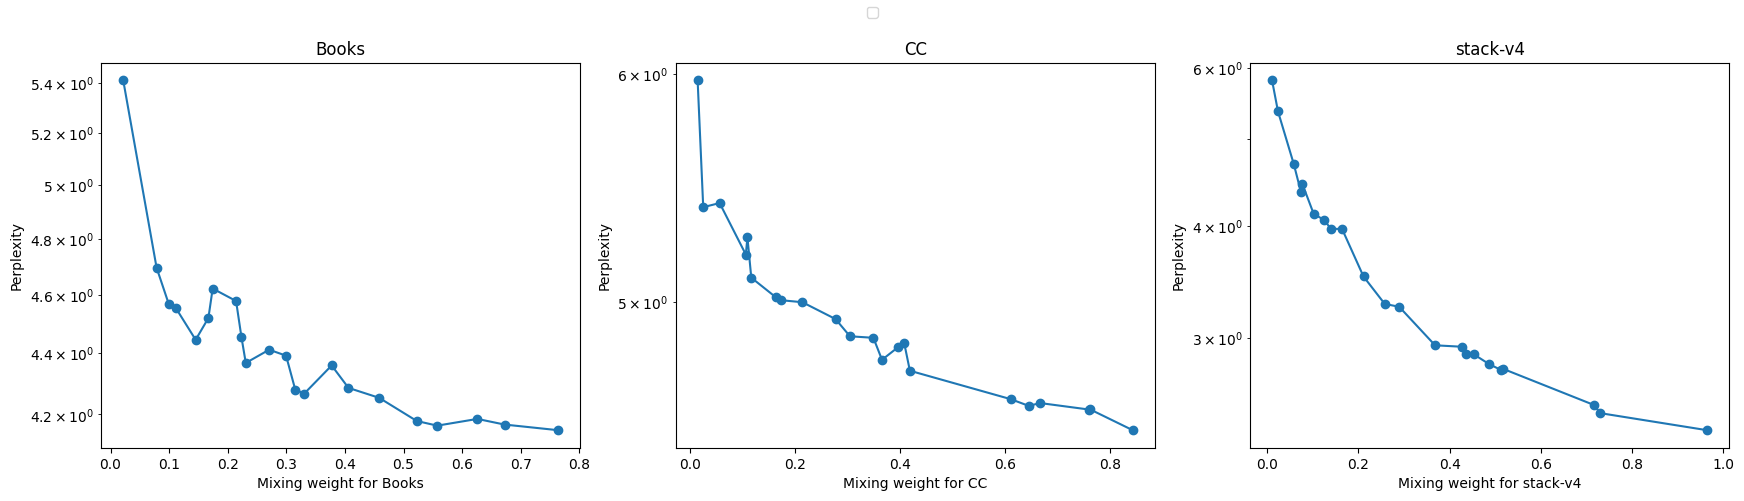

In [36]:
visualize(results, experiment)

In [34]:
def plot_visualizations(experiment, start_teratrions=None):
    all_weights1 = []
    res1 = []
    res2 = []
    res = []

    # preprocessing
    trial0 = experiment.trials[0]
    assert len(trial0.val_results.keys()) == 2
    key1 = list(trial0.val_results.keys())[0]
    key2 = list(trial0.val_results.keys())[1]

    for trial in experiment.trials:



        if trial.val_results is None:
            print(f"Skipping trial {trial.idx} as it has no val results")
            continue
        

        w1 = trial.true_mixing_weights[key1]
        w2 = trial.true_mixing_weights[key2]

        
        res1.append(trial.val_results[key1].perplexity)
        res2.append(trial.val_results[key2].perplexity)
        

        weights1.append(w1)
        res.append(trial.weighted_val_perplexity)

    # create 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

    # reorder results according to weights1
    res = [x for _, x in sorted(zip(weights1, res), key=lambda pair: pair[0])]
    res1 = [x for _, x in sorted(zip(weights1, res1), key=lambda pair: pair[0])]
    res2 = [x for _, x in sorted(zip(weights1, res2), key=lambda pair: pair[0])]
    weights1 = sorted(weights1)

    # plot 2
    axs[1].plot(weights1, res1,'-o')
    axs[1].set_xlabel(f'Mixing Weight {key1}')
    axs[1].set_ylabel(f'{key1} Perplexity')
    axs[1].set_yscale('log')

    # plot 3
    axs[].plot(weights1, res2, '-o')
    axs[1].set_xlabel(f'Mixing Weight {key1}')
    axs[1].set_ylabel(f'{key2} Perplexity')
    axs[1].set_yscale('log')


SyntaxError: invalid syntax (2916221534.py, line 49)

In [ ]:
def plot_visualizations2(experiment, start_teratrions=None):
    weights1 = []
    res1 = []
    res2 = []
    res = []

    # preprocessing
    trial0 = experiment.trials[0]
    assert len(trial0.val_results.keys()) == 2
    key1 = list(trial0.val_results.keys())[0]
    key2 = list(trial0.val_results.keys())[1]

    for trial in experiment.trials:
        if trial.val_results is None:
            print(f"Skipping trial {trial.idx} as it has no val results")
            continue
        

        w1 = trial.true_mixing_weights[key1]
        w2 = trial.true_mixing_weights[key2]

        
        res1.append(trial.val_results[key1].perplexity)
        res2.append(trial.val_results[key2].perplexity)
        

        weights1.append(w1)
        res.append(trial.weighted_val_perplexity)

    # create 3 subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

    # reorder results according to weights1
    res = [x for _, x in sorted(zip(weights1, res), key=lambda pair: pair[0])]
    res1 = [x for _, x in sorted(zip(weights1, res1), key=lambda pair: pair[0])]
    res2 = [x for _, x in sorted(zip(weights1, res2), key=lambda pair: pair[0])]
    weights1 = sorted(weights1)

    # plot 2
    axs[0].plot(weights1, res1,'-o')
    axs[0].set_xlabel(f'Mixing Weight {key1}')
    axs[0].set_ylabel(f'{key1} Perplexity')
    axs[0].set_yscale('log')

    # plot 3
    axs[1].plot(weights1, res2, '-o')
    axs[1].set_xlabel(f'Mixing Weight {key1}')
    axs[1].set_ylabel(f'{key2} Perplexity')
    axs[1].set_yscale('log')


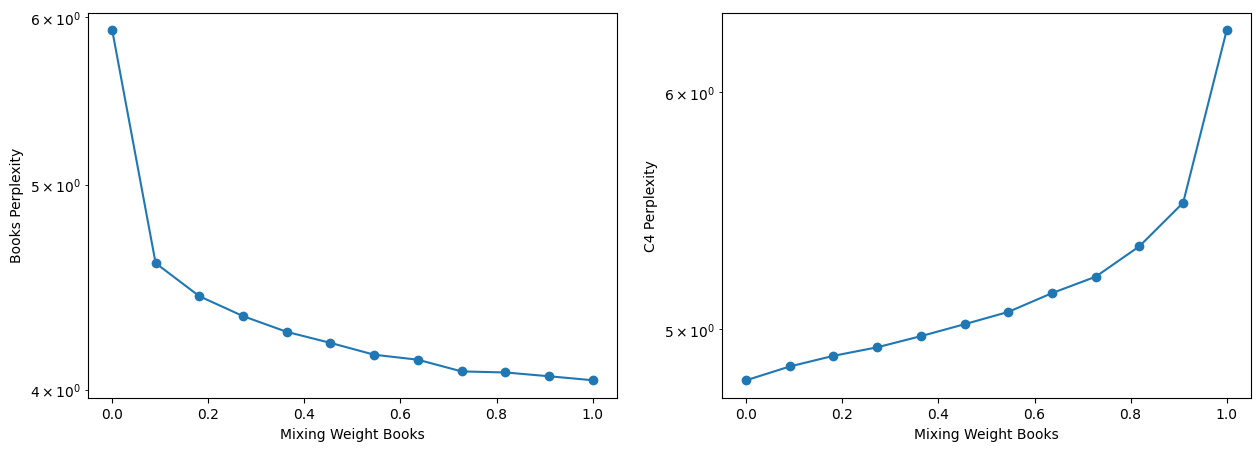

In [ ]:
plot_visualizations(experiment)

We can kinda reproduce their trend, however, at the extrems we completely break the assumption

This probably makes sense, however as it is never adapted I am curious how to handle this